<a href="https://colab.research.google.com/github/ProfDoeg/Colegio_Invisible/blob/main/14_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#! rm Colegio_Invisible -r

In [ ]:
! git clone https://github.com/ProfDoeg/Colegio_Invisible.git

Cloning into 'Colegio_Invisible'...
remote: Enumerating objects: 1085, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 1085 (delta 63), reused 0 (delta 0), pack-reused 990
Receiving objects: 100% (1085/1085), 131.04 MiB | 25.04 MiB/s, done.
Resolving deltas: 100% (744/744), done.
Checking out files: 100% (86/86), done.


for an image...there are pixels

each pixel has 3,4 values (Red Green Blue and sometime Alpha)

those numbers are...1 byte...0 to 255

In [ ]:
from PIL import Image
import numpy as np

what can we put into blockchain...
Op_Return
80 bytes and we will use 64 bytes for image data

each byte is made up of 8 binary values 1/0 called bits

64 bytes = 64*8...512 bits

We want to put image in single block

PROPOSAL:

16x16 image = 256 pixels

only get to use 2 bits per pixel

- 0,0  0 
- 0,1  64
- 1,0  128
- 1,1  192

1 byte [ , , , , , , , ]

1 byte can tell us color of 4 pixels
each one taking up 2 bits

In [ ]:
!ls Colegio_Invisible/img

Apollo_Slays_Python_1853.jpeg  hg_cry.jpeg	 rum_0.jpeg
asymmetric.png		       hg_drop.jpeg	 rum_1.jpeg
bab_crop.jpeg		       hg_hide.jpeg	 rum_2.jpeg
barb_1.jpeg		       hg_house.jpeg	 rum_3.jpeg
barb_2.jpeg		       hg_invite.jpeg	 rum_4.jpeg
barb_3.jpeg		       hg_rough.png	 rum_5.jpeg
barb_4.jpeg		       hg_xmas.jpeg	 rum_6.jpeg
barb_5.jpeg		       mask.png		 rum_7.jpeg
barb_6.jpeg		       peter2.png	 rump_final.jpeg
barb_7.jpeg		       peter3.png	 signature.png
cat.png			       peter4.png	 stego.png
chris.png		       peter.png	 symmetric.png
clavis.jpeg		       prv_pub_addr.png  zomnd.png
colegio_invisible.jpeg	       PubKeyToAddr.png


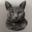

In [ ]:
stego_image=Image.open('Colegio_Invisible/img/cat.png')
stego_image=stego_image.resize((32,32))
stego_image

In [ ]:
type(stego_image)

PIL.Image.Image

In [ ]:
stego_array = np.array(stego_image)
stego_array

array([[[226, 223, 218, 255],
        [224, 220, 215, 255],
        [221, 218, 212, 255],
        ...,
        [204, 198, 192, 255],
        [201, 196, 189, 255],
        [200, 194, 188, 255]],

       [[219, 216, 210, 255],
        [217, 214, 208, 255],
        [214, 211, 205, 255],
        ...,
        [202, 197, 190, 255],
        [200, 195, 188, 255],
        [198, 193, 186, 255]],

       [[209, 206, 199, 255],
        [207, 204, 197, 255],
        [205, 201, 195, 255],
        ...,
        [200, 194, 187, 255],
        [199, 193, 186, 255],
        [197, 191, 185, 255]],

       ...,

       [[135, 127, 120, 255],
        [133, 125, 118, 255],
        [130, 122, 116, 255],
        ...,
        [162, 154, 146, 255],
        [162, 155, 147, 255],
        [163, 156, 148, 255]],

       [[134, 126, 120, 255],
        [132, 124, 118, 255],
        [129, 122, 115, 255],
        ...,
        [161, 153, 145, 255],
        [162, 154, 146, 255],
        [162, 155, 147, 255]],

       [[133

**`uint8`** stands for unsigned 8-bit integer
- 8 binary 1/0 values
- that is one byte
- a number from 0-255
- two hex values like ff

In [ ]:
2**8

256

In [ ]:
stego_array.dtype

dtype('uint8')

In [ ]:
stego_array.shape

(32, 32, 4)

In [ ]:
stego_array[:,:,:3]

array([[[226, 223, 218],
        [224, 220, 215],
        [221, 218, 212],
        ...,
        [204, 198, 192],
        [201, 196, 189],
        [200, 194, 188]],

       [[219, 216, 210],
        [217, 214, 208],
        [214, 211, 205],
        ...,
        [202, 197, 190],
        [200, 195, 188],
        [198, 193, 186]],

       [[209, 206, 199],
        [207, 204, 197],
        [205, 201, 195],
        ...,
        [200, 194, 187],
        [199, 193, 186],
        [197, 191, 185]],

       ...,

       [[135, 127, 120],
        [133, 125, 118],
        [130, 122, 116],
        ...,
        [162, 154, 146],
        [162, 155, 147],
        [163, 156, 148]],

       [[134, 126, 120],
        [132, 124, 118],
        [129, 122, 115],
        ...,
        [161, 153, 145],
        [162, 154, 146],
        [162, 155, 147]],

       [[133, 126, 119],
        [131, 124, 117],
        [129, 122, 115],
        ...,
        [160, 152, 144],
        [161, 153, 145],
        [163, 155, 147]]

In [ ]:
def grey_imgarr(imgarr):
  return imgarr[:,:,:3].mean(axis=2).astype('uint8')

In [ ]:
stego_array_grey=stego_array[:,:,:3].mean(axis=2).astype('uint8')
stego_array_grey.shape,stego_array_grey.dtype

((32, 32), dtype('uint8'))

In [ ]:
stego_array_grey

array([[222, 219, 217, ..., 198, 195, 194],
       [215, 213, 210, ..., 196, 194, 192],
       [204, 202, 200, ..., 193, 192, 191],
       ...,
       [127, 125, 122, ..., 154, 154, 155],
       [126, 124, 122, ..., 153, 154, 154],
       [126, 124, 122, ..., 152, 153, 155]], dtype=uint8)

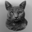

In [ ]:
stego_image_grey = Image.fromarray(stego_array_grey)
stego_image_grey

In [ ]:
def int_2_bit_array(num):
    bin_str=bin(num)
    bit_list=[int(bit) for bit in bin_str[2:]]
    bit_list=[0]*(8-len(bit_list))+bit_list
    bit_array=np.array(bit_list,dtype='uint8')
    return bit_array

In [ ]:
int_2_bit_array(255)

array([1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
int_2_bit_array(2)

array([0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [ ]:
int_2_bit_array(64)

array([0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
int_2_bit_array(65)

array([0, 1, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [ ]:
int_2_bit_array(68)

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [ ]:
int_2_bit_array(1)

array([0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [ ]:
int_2_bit_array(0)

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

Goal:

- take image of 256 bytes and reduce each byte to 2 bit in form of 2 element array
- turn that all into 512 bits
- turn 512 bits into 64 bytes

# Generalize Standard For Images (MxN)

If we create a standard for the header that describes the data stored then we can choose the following paramenters:

- length
- width
- color dim 
- color bit count

In total the number of bits is the product of all the parameters

## Greyscale Image 

## RGB Image

## Two Channel Color Standard

## Four Channel

## General Color Dim



In [ ]:
def grey_imgarr(imgarr):
  return imgarr[:,:,:3].mean(axis=2).astype('uint8')

def message_2_bit_array(message,mode=None):
    '''This function takes in a message as string, bytestring or hextring.
    If hexstring input the set mode='hex' '''
    if type(message)==bytes:
        hex_str=message.hex()
    elif (type(message)==str):
        if mode not in ('hex','hexstring'):
            hex_str=message.encode().hex()
        else:
            hex_str=message
    else:
        print('fix the input and mode')
        return None
    
    num=int('0x'+hex_str,base=16)
    byte_len=(len(hex_str)+1)//2
    bit_len=byte_len*8
    bin_str=bin(num)
    bit_list=[int(bit) for bit in bin_str[2:]]
    bit_list=[0]*(bit_len-len(bit_list))+bit_list
    bit_array=np.array(bit_list,dtype='uint8')
    return bit_array

def bit_array_2_byte_str(bit_array):
    '''Convert bit array to a bytestring'''
    bit_list=[ str(bit) for bit in bit_array]
    bin_str='0b'+(''.join(bit_list))
    num=int(bin_str,base=2)
    return num.to_bytes(len(bit_array)//8,'big')

def bit_array_2_hex_str(bit_array):  
    '''Convert a bit array to a hexstring'''
    return bit_array_2_byte_str(bit_array).hex()

def bit_array_2_str(bit_array,encoding='utf-8'):
    '''Convert a bit array to a string'''
    return bit_array_2_byte_str(bit_array).decode(encoding)

def int2bitarray(x,bit=8):
  return message_2_bit_array(hex(x)[2:],mode='hex')[:bit]

def bitarray2int(b_arr):
  ln=b_arr.shape[0]
  scales=(2**np.arange(7,-1,-1))[:ln]
  return (b_arr*scales).sum()

def imgarr2bitarray(imgarr,bit=8):
  return np.array([ int2bitarray(it,bit) for it in imgarr.reshape(-1)]).reshape(-1)

def bitarray2imgarr(barrs,imgshape=(16,16),bit=2,color=1):
  lns=len(barrs.reshape(-1))
  #Bs=barrs.reshape(*imgshape,bit)
  intlst=[ bitarray2int(barrs.reshape(-1)[i:i+bit]) for i in range(0,lns,bit) ]
  intarr=np.array(intlst).reshape(*imgshape,color).astype('uint8')
  return intarr
 
def bitarray2imgarr_scale(barrs,imgshape=(16,16),bit=2,color=1):
  lns=len(barrs.reshape(-1))
  #Bs=barrs.reshape(*imgshape,bit)
  intlst=[ bitarray2int_scale(barrs.reshape(-1)[i:i+bit]) for i in range(0,lns,bit) ]
  intarr=np.array(intlst).reshape(*imgshape,color).astype('uint8')
  return intarr

In [ ]:
class bitimage():

  def __init__(self,imgpath,dims=(16,16),bit=2,color=1):
    from PIL import Image
    self.color=color
    self.bit=bit
    self.dims=list(dims)
    self.img_og=Image.open(imgpath)
    self.img_resize=self.img_og.resize(dims)
    self.grey=grey_imgarr(np.array(self.img_resize))
    self.img_grey=Image.fromarray(self.grey)
    self.bitarray=imgarr2bitarray(self.grey,bit)
    self.bitarray_color=imgarr2bitarray(np.array(self.img_resize)[:,:,:color],bit)
    self.newimg=Image.fromarray(bitarray2imgarr(self.bitarray,imgshape=dims[::-1],bit=bit,color=1).squeeze())
    self.newimg_color=Image.fromarray(bitarray2imgarr(self.bitarray_color,imgshape=dims[::-1],bit=bit,color=3).squeeze())
    self.bytestring=bit_array_2_byte_str(self.bitarray)
    self.bytestring_color=bit_array_2_byte_str(self.bitarray_color)




In [ ]:
!ls Colegio_Invisible/img

Apollo_Slays_Python_1853.jpeg  hg_cry.jpeg	 rum_0.jpeg
asymmetric.png		       hg_drop.jpeg	 rum_1.jpeg
bab_crop.jpeg		       hg_hide.jpeg	 rum_2.jpeg
barb_1.jpeg		       hg_house.jpeg	 rum_3.jpeg
barb_2.jpeg		       hg_invite.jpeg	 rum_4.jpeg
barb_3.jpeg		       hg_rough.png	 rum_5.jpeg
barb_4.jpeg		       hg_xmas.jpeg	 rum_6.jpeg
barb_5.jpeg		       mask.png		 rum_7.jpeg
barb_6.jpeg		       peter2.png	 rump_final.jpeg
barb_7.jpeg		       peter3.png	 signature.png
cat.png			       peter4.png	 stego.png
chris.png		       peter.png	 symmetric.png
clavis.jpeg		       prv_pub_addr.png  zomnd.png
colegio_invisible.jpeg	       PubKeyToAddr.png


# Transform Image and Create Byte Encoding 

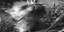

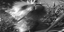

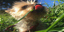

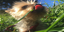

(16, 48)

In [ ]:
bimg=bitimage('Colegio_Invisible/img/peter2.png',dims=(64,32),bit=5,color=3)
display(bimg.newimg)
display(bimg.img_grey)
display(bimg.newimg_color)
display(bimg.img_resize)
len(bimg.bytestring)//80,len(bimg.bytestring_color)//80

# Create Embedding for Blockchain

In [ ]:
import hashlib 

message=bimg.bytestring_color
H=hashlib.sha256(message)

n=80
chunks = [message[i:i+n] for i in range(0, len(message), n)]

print(len(chunks))
print(len(chunks[-1]))

print(H.digest())

96
80
b'\xf4\xad\x9e\xac\x85\xe9\x14{W\xfa\xab\xf3\x08\x85\xbb\xa6\x9a\xe9L4\xbf\xda\xcbH\xae\xe25\x90|\x9d4\x98'


In [ ]:
header=b'\xc1\xdd\x00\x01\x03\xff\x01\x00\x40\x00\x40\x05'
text='Peter Bea'.encode()
print(len(header))
print(len(text))
header+text

12
9


b'\xc1\xdd\x00\x01\x03\xff\x01\x00@\x00@\x05Peter Bea'

In [ ]:
package=[header+text]+chunks
package

[b'\xc1\xdd\x00\x01\x03\xff\x01\x00@\x00@\x05Peter Bea',
 b"\x84\x1f(\xc20\x84\x1e\xe7\xb9\xcek\\\xd69\xad{Z\xf79\xees\xdc\xe8=\xf1\x84#\x08F\x10\x8cc\x18\xc6R\x94\xa5)\xces\x9d':R\x94\xa5+JV\xb5\xb5mj\xda\xd5\xb5\xebk\xda\xd7\xb5\xaf[^\xb6\xbdmz\xda\xf5\xb5\xedlZ\xf8\xe7;\xde\xf7\x9d",
 b'\xef9\xdd\xf3\x9e\xf7\xb1\x8c\xd6\xd7\x9d+9\xd2\xb5\xb5)YJr\x94\xa3\x19B1\x84c\x08F\x10\x84!\x08>\x0f|\x1e\xf8A\xef\x8c\x1e\xf79\xedk\xdc\xd75\xadc\x1a\xc69\xacsZ\xf75\xees\xdc\xe8=\xf0{\xe0\xf7\xc6\x10\x8c!\x18\xc61\x8c\xa5)\xces',
 b'\x9c\xe79\xcet\x9c\xe9JV\x94\xad\xadz\xd6\xd4\xad\xab[V\xb6\xad\xafk_\x18\xcd\xaf\x8a\xda\xf5\xad\xe9[_\x19\xf7\xbd\xef{|\xe6\xb7\xbew\xbd\xefm|N\x95\xa5+k^\x94\xac\xa59JQ\x8ce)Z\xd7\x94\xa7\x08B\x10\x83\xdf\x07\xbe\x0f| \xf8A\xef',
 b'sX\xe6\xb1\xcdk\xda\xd75\x8dc\x1a\xc5\xb5\x8csX\xe6\xb5\xees\xdc\xe7\xb9\xd0{\xe0\xf7\xc1\xf0\x84!\x18B1\x8c\xa5)JR\x94\xa5)\xcaS\x9c\xe7Z\xd6\xf7\xc5\xadz\xd6\xd4\xa5iJ\xd2\x95\xa5+J\xd7:\xd6\xf9\xcc\xebU\xb5\xeb[o\x9c\xff\xff\xff\xff\x

In [ ]:
! pip install eciespy eth_keys cryptos qrcode base58 

     |████████████████████████████████| 69 kB 4.4 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 555 kB 18.3 MB/s 
     |████████████████████████████████| 2.0 MB 51.6 MB/s 
     |████████████████████████████████| 105 kB 44.9 MB/s 
     |████████████████████████████████| 481 kB 72.8 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.2-cp37-cp37m-linux_x86_64.whl size=1230828 sha256=eb232e9ab58e70ffedcf4db579026d381f8edbbf9a63e5c8dda716372e608d2b
  Stored in directory: /root/.cache/pip/wheels/38/70/71/ca13ea3d36ccd0b3d0ec7d7a4ca67522048d695b556bba4f59
  Created wheel for qrcode: filename=qrcode-7.3.1-py3-none-any.whl size=40402 sha256=bdada86bb9eb34b586d2c33b76a1d8ea187ed568f9ea147d44b96b55d0cc4cf0
  Stored in directory: /root/.cache/pip/wheels/93/d7/39/a4111be2cfb8e679938aa671a37888b6afb1f9e7d748e94492
Successfully built cytoolz qrcode


In [ ]:
import pandas as pd
from cryptos.py3specials import safe_hexlify, from_string_to_bytes, from_int_to_byte, from_string_to_bytes
from cryptos import serialize,deserialize

import hashlib
import os
import getpass
import ecies
import eth_keys
import cryptos
import qrcode
import base58
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def import_privKey(privkey_filepath,password=None):
    if password==None:
        password = getpass.getpass("Input password for decrypting keyfile: ")
    password=password.encode()
    f=open(privkey_filepath,'rb')
    decrypted_bytes=ecies.aes_decrypt(key=hashlib.sha256(password).digest(),cipher_text=f.read())
    privKey=eth_keys.keys.PrivateKey(decrypted_bytes)
    return privKey

def import_pubKey(pubkey_filepath):
    f=open(pubkey_filepath,'rb')
    privKey=eth_keys.keys.PublicKey(f.read())
    return privKey

def import_addr(addr_filepath):
    return open(addr_filepath,'rb').read().decode()

def only_conf(utxos):
    return [utxo for utxo in utxos
            if doge.fetchtx(utxo['output'].split(':')[0])['confirmations']>0]

def mk_opreturn(msg, rawtx=None, json=0):
    
    def op_push(data):
        if type(data) == bytes:
            bytedata=data
        else:
            bytedata=data.encode()
        import struct
        if len(data) < 0x4c:
            return from_int_to_byte(len(bytedata)) + bytedata
        elif len(data) < 0xff:
            return from_int_to_byte(76) + struct.pack('<B', len(bytedata)) + bytedata
        elif len(data) < 0xffff:
            return from_int_to_byte(77) + struct.pack('<H', len(bytedata)) + bytedata
        elif len(data) < 0xffffffff:
            return from_int_to_byte(78) + struct.pack('<I', len(bytedata)) + bytedata
        else: raise Exception("Input data error. Rawtx must be hex chars" \
                            + "0xffffffff > len(data) > 0")

    orhex = safe_hexlify(b'\x6a' + op_push(msg))
    orjson = {'script' : orhex, 'value' : 0}
    if rawtx is not None:
        try:
            txo = deserialize(rawtx)
            if not 'outs' in txo.keys(): raise Exception("OP_Return cannot be the sole output!")
            txo['outs'].append(orjson)
            newrawtx = serialize(txo)
            return newrawtx
        except Exception as E:
            print(E)
            print(type(E))
            raise Exception("Raw Tx Error!")
    return orhex if not json else orjson

# Load Keys and Addresses

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cp drive/MyDrive/cinv/llaves.zip llaves.zip 
! unzip llaves.zip

Archive:  llaves.zip
   creating: llaves/
 extracting: llaves/mi_addr.bin      
 extracting: llaves/mi_addr.png      
 extracting: llaves/mi_pub.bin       
 extracting: llaves/mi_prv.enc       


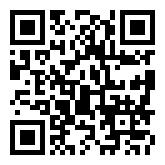

'0x7c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5'

'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX'

In [ ]:
from IPython.display import Image
qr=Image('llaves/mi_addr.png')

privKey=import_privKey('llaves/mi_prv.enc','')
pub=import_pubKey('llaves/mi_pub.bin').to_hex()
addr=import_addr('llaves/mi_addr.bin')

display(qr)
display(pub)
display(addr)

# Inspect Outputs

In [ ]:
doge=cryptos.Doge()
#addy=doge.privtoaddr(privkeyhex)
doge_unspents=only_conf( doge.unspent(addr) )
doge_unspent_total=sum([unspent['value'] for unspent in doge_unspents])
doge_unspent_total/10**8

577.46557057

# Create UTXO set for Enscription

In [ ]:
tip=13_70_000_000
available=doge_unspent_total-tip
n=len(package)
gift=int(available/n)
outputs=[{'value':gift , 'address': addr} for i in range(len(package))]
setup_tx=doge.mktx(doge_unspents,outputs)

In [ ]:
doge.signall(setup_tx,privKey.to_hex()[2:])

'0100000022b27c2496d604a102cd6fa4814b0affff89709ecfe7901ac01cd9381b9586ae53000000008a47304402203ae7b7a459935093fe7534f8d728592047eba5efeb1501936f66da97519bdad70220340831c96477fb031ba7ae694da6eda389d8203ef17a8dd81fbc7d045f7ded280141047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5ffffffff00899efc9d4b3f3ce3335eedb26fbf34fd709b8c925060bb4e39ec92db55e57d000000008b483045022100d6bc4339f8616e77d69357f61ad273b5f77ac5e27364abeccab987856af5557f022059e182df185ea1ae3671f5161658611391f52764d51742bd7a4eaba8b36c0b390141047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5ffffffff0e54b96e0057f5f4ac741bed36dbeef659ebe234425602ae2b83d26f7279141c000000008b48304502210093faa1f283dd4ec13d67f50fda8360d6c76d8353a4e37d47eb5747f63824115202201f8c2aa2fbc8761bd1430c5c0df6e126934dee599616d889563319b55a91b6430141047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b

In [ ]:
tip/(len(cryptos.serialize(setup_tx))/2)/100000

1.455124800849708

In [ ]:
funding=doge.pushtx(cryptos.serialize(setup_tx))
funding

{'data': {'network': 'DOGE',
  'txid': 'a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9'},
 'status': 'success'}

In [ ]:
doge.fetchtx(funding['data']['txid'])

{'blockhash': None,
 'confirmations': 0,
 'inputs': [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'from_output': {'output_no': 0,
    'txid': '53ae86951b38d91cc01a90e7cf9e7089ffff0a4b81a46fcd02a104d696247cb2'},
   'input_no': 0,
   'script': '304402203ae7b7a459935093fe7534f8d728592047eba5efeb1501936f66da97519bdad70220340831c96477fb031ba7ae694da6eda389d8203ef17a8dd81fbc7d045f7ded2801 047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5',
   'sequence': 4294967295,
   'type': 'pubkeyhash',
   'value': '5.17545453',
   'witness': None},
  {'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'from_output': {'output_no': 0,
    'txid': '7de555db92ec394ebb6050928c9b70fd34bf6fb2ed5e33e33c3f4b9dfc9e8900'},
   'input_no': 1,
   'script': '3045022100d6bc4339f8616e77d69357f61ad273b5f77ac5e27364abeccab987856af5557f022059e182df185ea1ae3671f5161658611391f52764d51742bd7a4eaba8b36c0b3901 047c88e9a4df6e9f45656c10bf66f

In [ ]:
#UTXO set
sparkle_unspents=only_conf( doge.unspent(addr) )
sparkle_unspents

[{'output': 'a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9:0',
  'value': 581201619},
 {'output': 'a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9:1',
  'value': 581201619},
 {'output': 'a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9:2',
  'value': 581201619},
 {'output': 'a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9:3',
  'value': 581201619},
 {'output': 'a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9:4',
  'value': 581201619},
 {'output': 'a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9:5',
  'value': 581201619},
 {'output': 'a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9:6',
  'value': 581201619},
 {'output': 'a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9:7',
  'value': 581201619},
 {'output': 'a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9:8',
  'value': 581201619},
 {'output': 'a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2

In [ ]:
len(sparkle_unspents)

97

In [ ]:
input_monolists=[ [elem] for elem in sparkle_unspents]

# Send 32*3 + 1 UTXOS from same txn back to self

# Create list of transactions each containing op_return

In [ ]:
write_tip=1_37_000_000
outputs=[ [{'value':elem['value']-write_tip , 'address': addr}] for elem in sparkle_unspents]

In [ ]:
outputs

[[{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 444201619}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 444201619}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 444201619}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 444201619}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 444201619}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 444201619}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 444201619}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 444201619}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 444201619}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 444201619}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 444201619}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 444201619}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 444201619}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8Q

        doge_serial_tx=cryptos.serialize(doge_tx)
        doge_inscribed_serial_tx=mk_opreturn( op_return , doge_serial_tx)
        doge_inscribed_tx=cryptos.deserialize(doge_inscribed_serial_tx)
        doge_signed_inscribed_tx=doge.signall(doge_inscribed_tx,privkeyhex)
        broadcast_doge_signed_inscribed_tx=doge.pushtx(doge_signed_inscribed_tx)

In [ ]:
txns=[ doge.mktx(input_monolists[i],outputs[i]) for i in range(len(package))]

In [ ]:
serial_txns=[cryptos.serialize(tx) for tx in txns]

In [ ]:
inscribed_serial_txs=[mk_opreturn( package[i] , serial_txns[i]) for i in range(len(package))]

In [ ]:
1.37/len(inscribed_serial_txs[0])/2

0.0029273504273504276

In [ ]:
inscribed_serial_txs

['0100000001b9f71724c5fd70837b2acaf28bcdeb593e65ca209e5b6b68a8f453d625861ea00000000000ffffffff0293fa791a000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f88ac0000000000000000176a15c1dd000103ff01004000400550657465722042656100000000',
 '0100000001b9f71724c5fd70837b2acaf28bcdeb593e65ca209e5b6b68a8f453d625861ea00100000000ffffffff0293fa791a000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f88ac0000000000000000536a4c50841f28c230841ee7b9ce6b5cd639ad7b5af739ee73dce83df184230846108c6318c65294a529ce739d273a5294a52b4a56b5b56d6adad5b5eb6bdad7b5af5b5eb6bd6d7adaf5b5ed6c5af8e73bdef79d00000000',
 '0100000001b9f71724c5fd70837b2acaf28bcdeb593e65ca209e5b6b68a8f453d625861ea00200000000ffffffff0293fa791a000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f88ac0000000000000000536a4c50ef39ddf39ef7b18cd6d79d2b39d2b5b529594a7294a319423184630846108421083e0f7c1ef841ef8c1ef739ed6bdcd735ad631ac639ac735af735ee73dce83df07be0f7c6108c2118c6318ca529ce7300000000',
 '0100000001b9f71724c5fd70837b2acaf28bcdeb5

In [ ]:
inscribed_txs=[cryptos.deserialize(elem) for elem in inscribed_serial_txs]

In [ ]:
signed_inscribed_txs=[doge.signall(elem,privKey.to_hex()[2:]) for elem in inscribed_txs]

In [ ]:
broadcasts=[doge.pushtx(elem) for elem in signed_inscribed_txs]
broadcasts

[{'data': {'network': 'DOGE',
   'txid': '90c01813156e594c4dbe8bd39436597c68ffaaa201c458f9c1ccae3e86d2c33f'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': 'cf0f325d00cc33cedde905f1132855c569ae573f3aa1493c837652aeebee18bc'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': 'c682f3de33dd6e882d6cbf499d28d6ebd87fecd2fad7108065fa5390d7a00458'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': '7f9b29b2044836633e01d4d47f503f53633433eaa4916e816ac7e59bc3adc60f'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': '2ae27a0deaa2d5d9552cddca69d230f3805d96a33d9f7b23441545fea3449b15'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': '7d2b514eec23fd6e5fe54b9ff6ef960e497006bb67e9d9346dc17afa773441e0'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': 'e37652ffd099b7228e54c6c5c1409ae005c18f4d8b4ba84e006311c056a311f2'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': '0238f55d0b9f7072fbb8

In [ ]:
broadcasts[0]['data']['txid']

'90c01813156e594c4dbe8bd39436597c68ffaaa201c458f9c1ccae3e86d2c33f'

# Everything is Retrievable From the TX Hash of Header Transaction 

The first transaction, spending the first output of the prepared UTXOs

```
53ae86951b38d91cc01a90e7cf9e7089ffff0a4b81a46fcd02a104d696247cb2

90c01813156e594c4dbe8bd39436597c68ffaaa201c458f9c1ccae3e86d2c33f
```

Or use the UTXO set transactions

```
c1542c10399a09a5471799133c472a6652d5cb3b7b421e1a7e80e2039f5b393b

a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9
```

In [ ]:
[doge.fetchtx(broadcast['data']['txid'])['confirmations'] for broadcast in broadcasts]

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3]

In [ ]:
doge.block_height()

# Automate Reading From Dogecoin Blockchain

In [ ]:
doge=cryptos.Doge()
doge.fetchtx('a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9')

{'blockhash': '4fc98c5553dc5fe736db42ff1aab70c70bac53db4c53552b26374e2b80535884',
 'confirmations': 1258,
 'inputs': [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'from_output': {'output_no': 0,
    'txid': '53ae86951b38d91cc01a90e7cf9e7089ffff0a4b81a46fcd02a104d696247cb2'},
   'input_no': 0,
   'script': '304402203ae7b7a459935093fe7534f8d728592047eba5efeb1501936f66da97519bdad70220340831c96477fb031ba7ae694da6eda389d8203ef17a8dd81fbc7d045f7ded2801 047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5',
   'sequence': 4294967295,
   'type': 'pubkeyhash',
   'value': '5.17545453',
   'witness': None},
  {'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'from_output': {'output_no': 0,
    'txid': '7de555db92ec394ebb6050928c9b70fd34bf6fb2ed5e33e33c3f4b9dfc9e8900'},
   'input_no': 1,
   'script': '3045022100d6bc4339f8616e77d69357f61ad273b5f77ac5e27364abeccab987856af5557f022059e182df185ea1ae3671f5161658611

In [ ]:
import requests
bea_txn='a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9'

r = requests.get(f'https://sochain.com/api/v2/tx/DOGE/{bea_txn}')
r.status_code

200

In [ ]:
type(r.text)

str

In [ ]:
def get_output_spend_txns(txn_ident):
  import requests
  import json
  r = requests.get(f'https://sochain.com/api/v2/tx/DOGE/{txn_ident}')
  tmp=open('tmp.json','wt')
  tmp.write(r.text)
  tmp.close()
  tmp2=open('tmp.json','rt')
  spend_data=json.load(tmp2)
  return [out['spent']['txid'] for out in spend_data['data']['outputs']]

In [ ]:
get_output_spend_txns('a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9')

['90c01813156e594c4dbe8bd39436597c68ffaaa201c458f9c1ccae3e86d2c33f',
 'cf0f325d00cc33cedde905f1132855c569ae573f3aa1493c837652aeebee18bc',
 'c682f3de33dd6e882d6cbf499d28d6ebd87fecd2fad7108065fa5390d7a00458',
 '7f9b29b2044836633e01d4d47f503f53633433eaa4916e816ac7e59bc3adc60f',
 '2ae27a0deaa2d5d9552cddca69d230f3805d96a33d9f7b23441545fea3449b15',
 '7d2b514eec23fd6e5fe54b9ff6ef960e497006bb67e9d9346dc17afa773441e0',
 'e37652ffd099b7228e54c6c5c1409ae005c18f4d8b4ba84e006311c056a311f2',
 '0238f55d0b9f7072fbb8d7c55c75624cc61c3b9bf3a49710ddc5c1b8ee370d59',
 '40a1252151a21a47834a1e34f467ccdcf9eae17aba7a12334e02d1aae4193e4a',
 'fc77eabae6b98782fe9e53a4d1682d8a5da798aec4c77992b947913e03c3f314',
 '0f888cafb1a66e00cb7a9186a2b0ec88424d1ca17c84f9087d45d8dae80ebcea',
 'c8b41a54da2a57288d14e31fb380dc74e5866b4341e5c279a4e1c596c3aa2ea0',
 'd1265f7ae5cf0cde3bb1450ea5623f17cf5c86ad5064f64925421645e54c95e8',
 'c60866a55c283d3cbb4ffe09dd678a7fe2e48c8304e8472a41889ffbbc7eb277',
 '5f746e2bf3f21b192430938e340ae3ae

In [ ]:
import numpy as np
import cryptos
from PIL import Image

def read_image(txn_id):
  doge=cryptos.Doge()
  img_header_tx_data=doge.fetchtx(txn_id)
  op_return=img_header_tx_data['outputs'][1]['script'][10:]
  utxo_id=img_header_tx_data['inputs'][0]['from_output']['txid']
  blk_height= doge.block_height(txn_id)
  cand_txns=doge.block_info(blk_height)['tx_hashes'][1:]+doge.block_info(blk_height-1)['tx_hashes'][1:]+doge.block_info(blk_height+1)['tx_hashes'][1:]+doge.block_info(blk_height+2)['tx_hashes'][1:]
  cand_txns_info=[(cand,doge.fetchtx(cand)) for cand in cand_txns]
  img_txn_info=[ ( info['inputs'][0]['from_output']['output_no'],info['outputs'][1]['script'][10:] ) for (_,info) in cand_txns_info if info['inputs'][0]['from_output']['txid']==utxo_id]
  img_data_list=sorted(img_txn_info)
  hex_header=img_data_list[0][1]
  img_hex = ''.join([elem[1] for elem in img_data_list[1:]])
  image_bytes=bytes.fromhex(img_hex)
  L=int(hex_header[14:18],16)
  W=int(hex_header[18:22],16)
  B=int(hex_header[22:24],16)
  print(L,W,B)
  print(len(img_data_list))
  sparkle_bits=message_2_bit_array(image_bytes,mode=None)
  spark_array=bitarray2imgarr(sparkle_bits,imgshape=(L,W),bit=B,color=1).squeeze()
  return op_return,spark_array
  
def read_image_color(txn_id):
  doge=cryptos.Doge()
  img_header_tx_data=doge.fetchtx(txn_id)
  op_return=img_header_tx_data['outputs'][1]['script'][10:]
  utxo_id=img_header_tx_data['inputs'][0]['from_output']['txid']
  blk_height= doge.block_height(txn_id)
  cand_txns=doge.block_info(blk_height)['tx_hashes'][1:]+doge.block_info(blk_height-1)['tx_hashes'][1:]+doge.block_info(blk_height+1)['tx_hashes'][1:]+doge.block_info(blk_height+2)['tx_hashes'][1:]
  cand_txns_info=[(cand,doge.fetchtx(cand)) for cand in cand_txns]
  img_txn_info=[ ( info['inputs'][0]['from_output']['output_no'],info['outputs'][1]['script'][10:] ) for (_,info) in cand_txns_info if info['inputs'][0]['from_output']['txid']==utxo_id]
  img_data_list=sorted(img_txn_info)
  hex_header=img_data_list[0][1]
  img_hex = ''.join([elem[1] for elem in img_data_list[1:]])
  image_bytes=bytes.fromhex(img_hex)
  L=int(hex_header[14:18],16)
  W=int(hex_header[18:22],16)
  B=int(hex_header[22:24],16)
  print(L,W,B)
  print(len(img_data_list))
  sparkle_bits=message_2_bit_array(image_bytes,mode=None)
  spark_array=bitarray2imgarr(sparkle_bits,imgshape=(L,W),bit=B,color=3).squeeze()
  return op_return,spark_array
  

In [ ]:
def read_image_fund(txn_id):
  doge=cryptos.Doge()
  L=get_output_spend_txns(txn_id)
  img_header_tx_data=doge.fetchtx(L[0])
  op_return=img_header_tx_data['outputs'][1]['script'][10:]
  img_data_list=[doge.fetchtx(elem)['outputs'][1]['script'][10:] for elem in L ]
  hex_header=img_data_list[0]
  img_hex = ''.join([elem[1] for elem in img_data_list[1:]])
  image_bytes=bytes.fromhex(img_hex)
  L=int(hex_header[14:18],16)
  W=int(hex_header[18:22],16)
  B=int(hex_header[22:24],16)
  print(L,W,B)
  print(len(img_data_list))
  sparkle_bits=message_2_bit_array(image_bytes,mode=None)
  spark_array=bitarray2imgarr(sparkle_bits,imgshape=(L,W),bit=B,color=1).squeeze()
  return op_return,spark_array

In [ ]:

op_ret,sp_ar=read_image('53ae86951b38d91cc01a90e7cf9e7089ffff0a4b81a46fcd02a104d696247cb2')

64 64 5
33


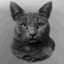

In [ ]:
from PIL import Image
Image.fromarray(sp_ar)

In [ ]:
op_ret_color,sp_ar_color=read_image_color('90c01813156e594c4dbe8bd39436597c68ffaaa201c458f9c1ccae3e86d2c33f')

64 64 5
97


In [ ]:

sp_ar_color.shape

(64, 64, 3)

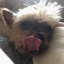

In [ ]:
Image.fromarray(sp_ar_color)

In [ ]:
op_ret_color

'c1dd000103ff010040004005506574657220426561'

In [ ]:
bytes.fromhex(op_ret_color[24:]).decode()

'Peter Bea'